##**Importing libraries**

In [1]:
import imutils # Has basic image processing functions
import cv2 #OpenCV

In [2]:
from google.colab.patches import cv2_imshow

##**Mounting the drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**For udnie** 

In [4]:
#Torch is a scientific computing framework with wide support for machine learning algorithms 

net = cv2.dnn.readNetFromTorch("/content/drive/MyDrive/udnie.t7") #Reads a network model stored in Torch7 framework's format.


##**For feathers**

In [5]:
net = cv2.dnn.readNetFromTorch("/content/drive/My Drive/feathers.t7")

##**For Starry Night**

In [17]:
net = cv2.dnn.readNetFromTorch("/content/drive/My Drive/starry_night.t7")

##**For The Scream**

In [ ]:
net = cv2.dnn.readNetFromTorch("/content/drive/My Drive/the_scream.t7")

##**For Mosaic**

In [ ]:
net = cv2.dnn.readNetFromTorch("/content/drive/My Drive/mosaic.t7")

##**For The Wave**

In [ ]:
net = cv2.dnn.readNetFromTorch("/content/drive/My Drive/the_wave.t7")

##**For la muse**

In [ ]:
net = cv2.dnn.readNetFromTorch("/content/drive/My Drive/la_muse.t7")

##**For Candy**

In [24]:
net = cv2.dnn.readNetFromTorch("/content/drive/My Drive/candy.t7")

##**Sending the input image**

In [25]:
image = cv2.imread("/content/tom_jerry.jpg")


In [26]:
image.shape

(450, 600, 3)

In [27]:
image = imutils.resize(image, width=600) # Resize the image
(h, w) = image.shape[:2]

In [28]:
image.shape

(450, 600, 3)

###**Creating a blob from the image. The parameters are :**


1.   image : The input image
2.   scalefactor : In this case no scaling is applied hence the value is 1
3.   size : That the model expects as an input
4.   mean subtraction values : In the B,G,R format
5.   swapRB : Whether to swap R and B channels
6.   crop : Whether to crop or not



In [29]:
blob = cv2.dnn.blobFromImage(image, 1.0, (w, h),(103.939, 116.779, 123.680), swapRB=False, crop=False)
blob

array([[[[106.061    , 106.061    , 108.061    , ..., -36.939003 ,
          -38.939003 , -40.939003 ],
         [103.061    , 103.061    , 106.061    , ..., -36.939003 ,
          -39.939003 , -41.939003 ],
         [103.061    , 103.061    , 106.061    , ..., -36.939003 ,
          -38.939003 , -40.939003 ],
         ...,
         [ 20.060997 ,  21.060997 ,  22.060997 , ...,  28.060997 ,
           26.060997 ,  24.060997 ],
         [ 26.060997 ,  25.060997 ,  24.060997 , ...,  26.060997 ,
           27.060997 ,  29.060997 ],
         [ 26.060997 ,  25.060997 ,  24.060997 , ...,  26.060997 ,
           27.060997 ,  29.060997 ]],

        [[ 82.221    ,  82.221    ,  82.221    , ..., -55.779    ,
          -57.779    , -59.779    ],
         [ 79.221    ,  79.221    ,  80.221    , ..., -55.779    ,
          -58.779    , -60.779    ],
         [ 77.221    ,  77.221    ,  78.221    , ..., -55.779    ,
          -57.779    , -59.779    ],
         ...,
         [ -5.7789993,  -4.7789993

In [30]:
#Sending the input image into the network and get the output

net.setInput(blob)
output = net.forward()

In [31]:
output.shape

(1, 3, 452, 600)

In [32]:
# Converting from 4d tensor to 3d by eliminating the batchsize

output = output.reshape((3, output.shape[2], output.shape[3]))
output

array([[[ 29.31274  ,  33.06753  ,  40.908863 , ...,  -6.9718895,
          -0.3607068,  19.054749 ],
        [ 31.901524 ,  37.327015 ,  46.154697 , ..., -11.661139 ,
          -5.3297496,  18.439138 ],
        [ 37.437756 ,  45.06673  ,  52.561935 , ..., -17.87403  ,
          -8.29928  ,  18.69253  ],
        ...,
        [-33.07569  , -41.62958  , -44.91202  , ..., -21.269861 ,
         -13.801329 ,  -9.129042 ],
        [-34.906975 , -44.746017 , -48.775692 , ..., -21.695124 ,
         -15.273046 ,  -8.475542 ],
        [-32.916393 , -43.342094 , -47.77534  , ..., -16.27824  ,
         -10.136182 ,  -3.0371642]],

       [[ 36.63297  ,  32.395943 ,  38.04107  , ...,  49.793453 ,
          49.90654  ,  57.342266 ],
        [ 42.43948  ,  38.736256 ,  43.928417 , ...,  58.296783 ,
          54.3418   ,  62.07793  ],
        [ 50.28213  ,  48.755547 ,  50.91476  , ...,  64.803154 ,
          62.65171  ,  69.42945  ],
        ...,
        [-46.434357 , -52.00202  , -54.829132 , ...,  

In [33]:
#Adding the values back which were subtracted previously during mean subtraction and converting from chnnels first to channels last

output[0] += 103.939
output[1] += 116.779
output[2] += 123.680
output = output.transpose(1, 2, 0)

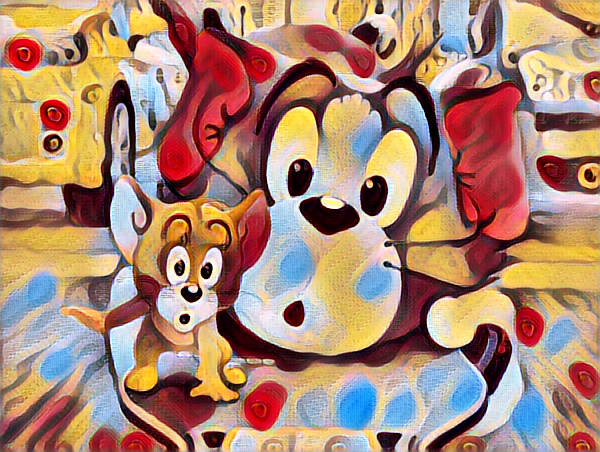

In [34]:
cv2_imshow(output)

In [36]:
#Writing the final output

cv2.imwrite("output_candy.jpg",output)


True